# 6.6 Task - Time Series Analysis - CareerFoundry

## In this Notebook I will:

## 1. Import Libraries.
## 2. Find a data set to work with and import it to the notebook.

## 3. Make a subset of data set if necessary and make sure data set doesn’t include any forecasted data.
## 3a. In a markdown cell below the subset explain what logic I was following when selecting data points.
## 3b. Reset the index, subset, then reset the “Date” column as the index in the new dataframe.
## 4. Create a line chart of your data.
## 5. Decompose the data’s components.
## 5a. Analyze the results from the plot in a markdown cell.
## 6. Conduct a Dickey-Fuller test to check for stationarity.
## 6a. Interpret the results in a markdown cell and reference my null hypothesis.
## 7. If my data isn’t stationary, conduct a round of differencing on it and repeat step 6.
## 8. If my data still isn’t stationary, perform another round of differencing and repeat step 6.
## 9. Check my data’s autocorrelations.

In [1]:
# 1. Import Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Configure API Key

quandl.ApiConfig.api_key = 'pJ3dAcVifaqY71AFoLFM'

## 2. Find a data set to work with and import it to the notebook.

In [4]:
# Fetch data

data = quandl.get('WIKI/AAPL') #Apple stock price

In [5]:
# Check output

data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [6]:
# Date is the index, which is great...
# However, this is a univariate Time Series Analysis
# Therefore, I will need to drop the columns and keep the 'Close' column, as I am only interested in the closing price.
# I will also be subsetting for a more recent period of time later on.

In [7]:
# Keep only the 'Close' column

data = data[['Close']]

In [8]:
# Recheck output

data.head()

,Close
Date,
1980-12-12,28.75
1980-12-15,27.25
1980-12-16,25.25
1980-12-17,25.87
1980-12-18,26.63


In [9]:
# Perfect!!

data.tail()

,Close
Date,
2018-03-21,171.270
2018-03-22,168.845
2018-03-23,164.940
2018-03-26,172.770
2018-03-27,168.340


In [10]:
data.columns

Index(['Close'], dtype='object')

In [11]:
data.shape

(9400, 1)

In [12]:
type(data)

pandas.core.frame.DataFrame

## 3. Make a subset of data set if necessary and make sure data set doesn’t include any forecasted data.

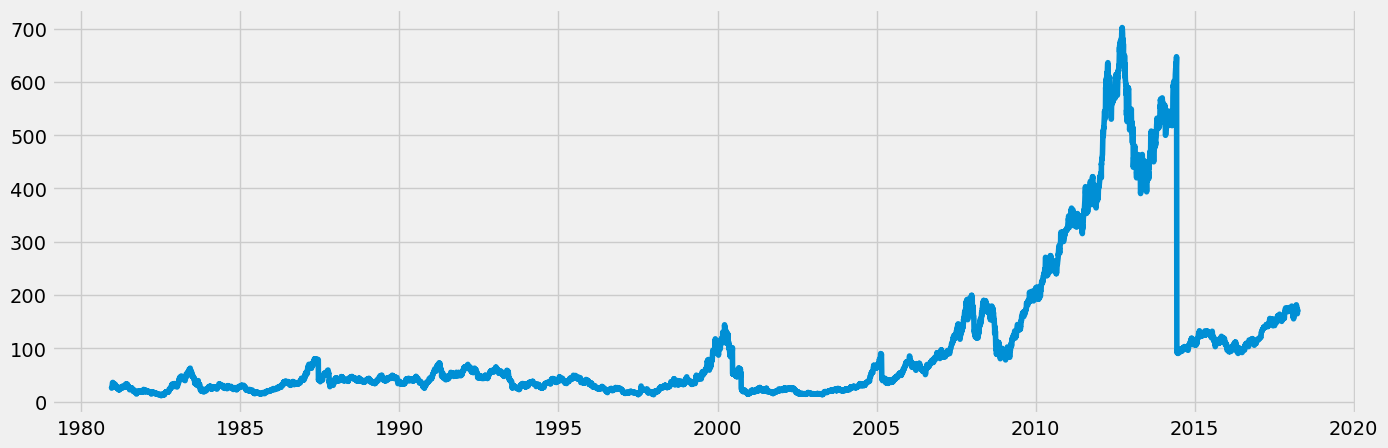

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [14]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [15]:
data_2.head()

,Date,Close
0,1980-12-12,28.75
1,1980-12-15,27.25
2,1980-12-16,25.25
3,1980-12-17,25.87
4,1980-12-18,26.63


In [16]:
data_2.columns

Index(['Date', 'Close'], dtype='object')

In [17]:
# Create Data Subset to filter out irrelevant data

data_sub = data_2.loc[(data_2['Date'] >= '2008-01-01') & (data_2['Date'] < '2019-01-01')]

In [18]:
data_sub.head()

,Date,Close
6825,2008-01-02,194.84
6826,2008-01-03,194.93
6827,2008-01-04,180.05
6828,2008-01-07,177.64
6829,2008-01-08,171.25


In [19]:
data_sub.tail()

,Date,Close
9395,2018-03-21,171.270
9396,2018-03-22,168.845
9397,2018-03-23,164.940
9398,2018-03-26,172.770
9399,2018-03-27,168.340


In [20]:
data_sub.shape

(2575, 2)

In [21]:
data_sub.columns

Index(['Date', 'Close'], dtype='object')

## 3a. In a markdown cell below the subset explain what logic I was following when selecting data points.

### I am only interested in the upward trend from 2008 (right around the beginning of the world economic crisis) through as current as possible. I am also interested in the steep drop in stock price that occurred roughly 2013/2014. Therefore, I will be subsetting for 2008-2018 (the most recent decade). 

## 3b. Reset the index, subset, then reset the “Date” column as the index in the new dataframe.

In [22]:
# Now time to Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date."
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Close
datetime,
2008-01-02,194.84
2008-01-03,194.93
2008-01-04,180.05
2008-01-07,177.64
2008-01-08,171.25


### Now the datetime column is the index and we only have one variable (Value) which is exactly what we need for a univariate time-series analysis of this unemployment data set.

## 4. Create a line chart of your data.

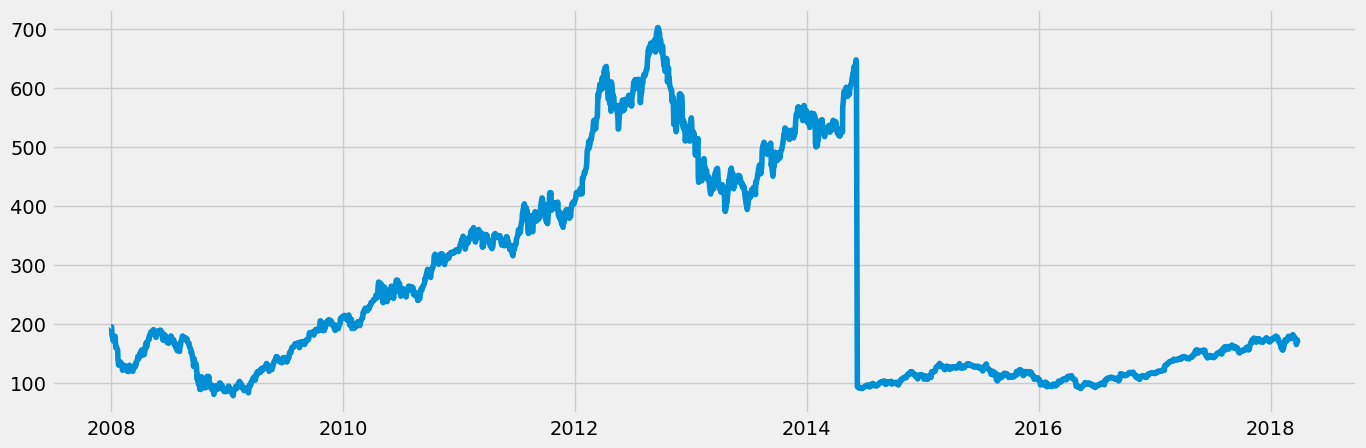

In [23]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

## 5. Decompose the data’s components.

In [24]:
# Check for missing values

data_sub.isnull().sum() 

Close    0
dtype: int64

In [25]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

122

In [26]:
data_sub = data_sub.drop_duplicates()

In [27]:
# Re-Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

In [28]:
# Decompose the time series using an additive model
# I am using a multiplicative model because the data trend is not linear
# Period of 30 days to account for daily results, I'd like those rounded to every 30 days to have fewer datapoints

decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative', period=30)

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

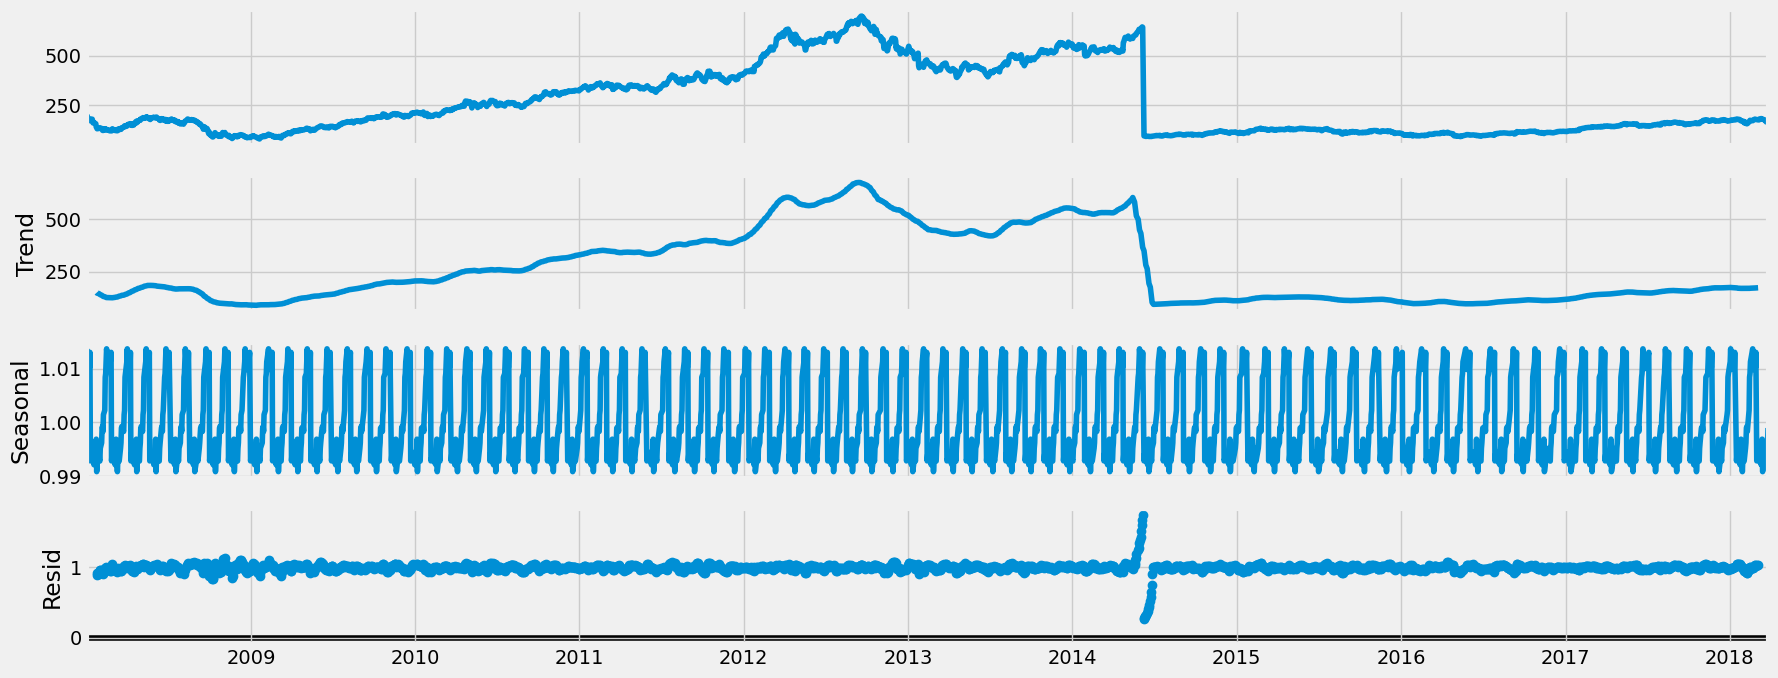

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

## 5a. Analyze the results from the plot in a markdown cell.

### There is a steady positive trend from 2008 until the middle of 2014, when a significant and swift negative trend occurs before stabalizing around and remaining consistent with little to no variation until 2018.

### The Seasonal component looks like the eKg/eCg of someone with ventricular fibrillation (erratically up and down over and over again). Likely due to the lack of seasonality in the data. 

### The Residual or 'Noise' is consistently steady around '1' until the significant negative trend of mid-2014. This is a lot of noise in a short period of time, but fortunately it is only for one or two months of the entire data-set. I am satisfied, overall, with the lack of noise discovered during the decomposition. 

### It is highly likely that this data will not be stationary, and it may be challenging to stationarize it.

## 6. Conduct a Dickey-Fuller test to check for stationarity.

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Close'])

Dickey-Fuller Stationarity test:
Test Statistic                   -1.762767
p-value                           0.399097
Number of Lags Used               0.000000
Number of Observations Used    2452.000000
Critical Value (1%)              -3.433020
Critical Value (5%)              -2.862719
Critical Value (10%)             -2.567398
dtype: float64


## 6a. Interpret the results in a markdown cell and reference my null hypothesis.

### To clarify my Null Hypothesis is that there IS a unit root (any random jump that can’t be explained by variation in the data). 
### My Alternative Hypothesis is that there IS NOT a unit root.
### Based on the results above, I have a Test Statistic value [-1.76] that is larger than my Critical Value (5%) [-2.86]. I also have a p-value [0.399] which is significantly greater than 0.05. 
### Therefore, I fail to reject the Null Hypothesis, or to prove that the data is stationary, and I must Stationarize the data before proceeding with a Time Series Analysis.

## 7. If my data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [33]:
# I will use the Differencing Method to Stationarize the data

data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [34]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [35]:
data_diff.head()

,Close
datetime,
2008-01-03,0.09
2008-01-04,-14.88
2008-01-07,-2.41
2008-01-08,-6.39
2008-01-09,8.15


In [36]:
data_diff.tail()

,Close
datetime,
2018-03-21,-3.970
2018-03-22,-2.425
2018-03-23,-3.905
2018-03-26,7.830
2018-03-27,-4.430


In [37]:
data_diff.columns

Index(['Close'], dtype='object')

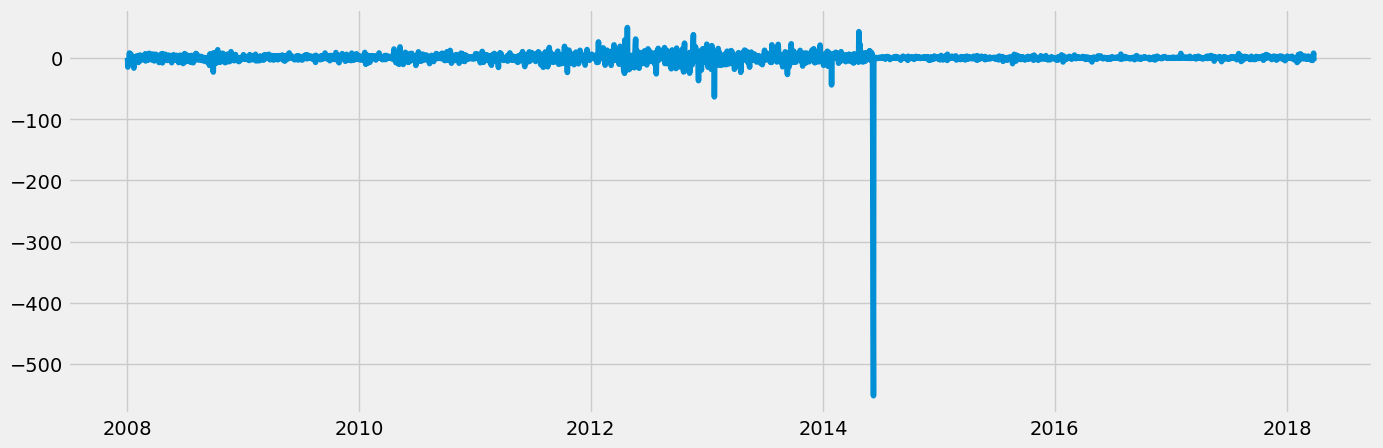

In [38]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
# Repeat Step 6 with another Dickey Fuller Test

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -49.132186
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    2451.000000
Critical Value (1%)              -3.433021
Critical Value (5%)              -2.862720
Critical Value (10%)             -2.567398
dtype: float64


## The data is now stationary! There is still significant noise in 2014, however, with a Test Statistic of -49.13 and a Critical Value (5%) of -2.86 and a p-value of 0.00, we can assuredly reject the Null Hypothesis and accept the Alternate Hypothesis. In other words, there IS NOT a unit root and the data is deemed stationary for Time Series Analysis purposes.

## 8. If my data still isn’t stationary, perform another round of differencing and repeat step 6.

### Luckily, step 8 does not apply since the data was stationarized successfully in Step 7 (see above).

## 9. Check my data’s autocorrelations.

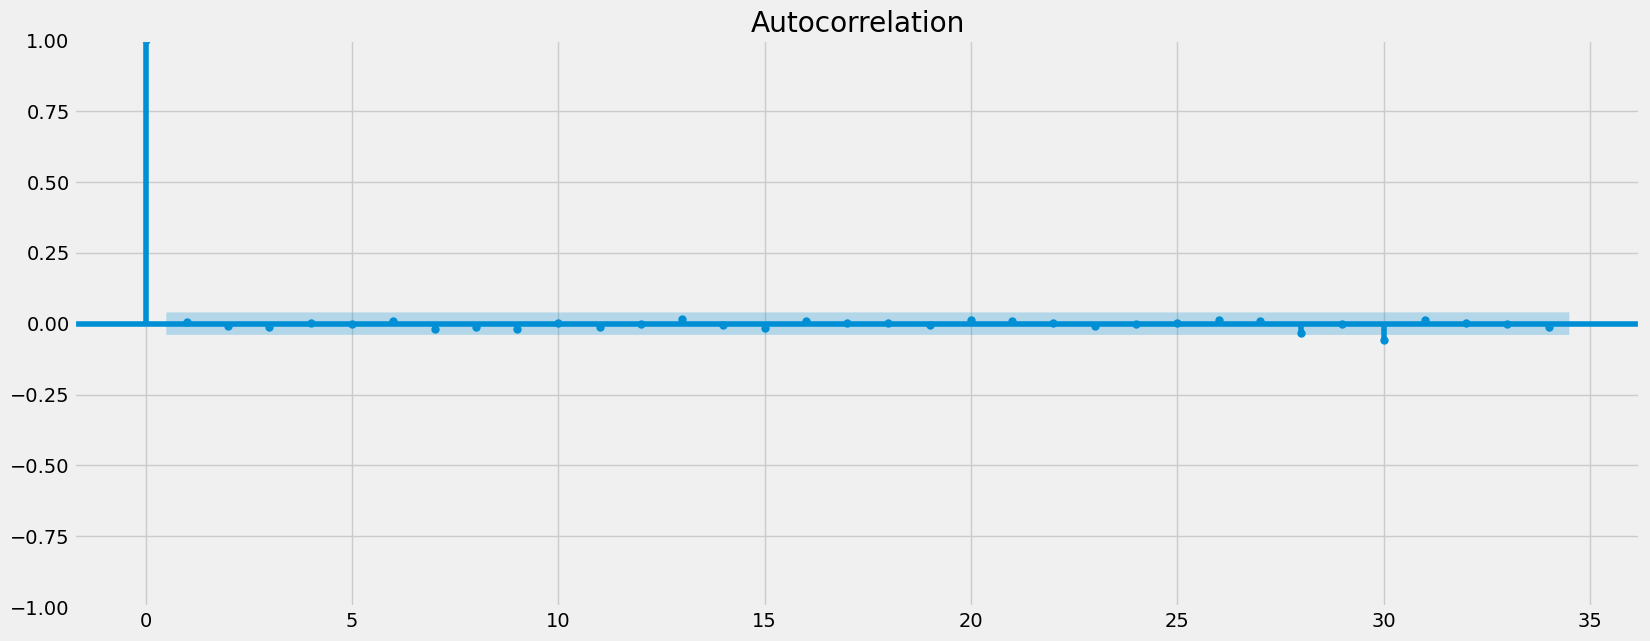

In [41]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

## Only 1 value above and 1 value below the blue shaded portion indicates that there are not enough values to indicate autocorrelation in the stationarized data (10 values above or below the shaded portion are what is typically deemed autocorrelated data when running this plot).